**1.
Напишите функцию, которая будет получать на вход произвольную строку, отбирать только числа, затем складывать их, результат делить на 3,5 и выводить результат, округленный до двух знаков после запятой.**

string1 = 'abcdE1435fgGfeDc 56ba'

string2 = 'lkjdagkljhfiug;ro;eigj'

string3 = '98465348948129845983'

In [1]:
string1 = 'abcdE1435fgGfeDc 56ba'
string2 = 'lkjdagkljhfiug;ro;eigj'
string3 = '98465348948129845983'

In [2]:
def my_func(string):
    return round(sum((int(x) for x in string if x.isdigit())) / 3.5, 2)

In [3]:
my_func(string1)

6.86

In [4]:
my_func(string2)

0.0

In [5]:
my_func(string3)

33.43

**2.  from sklearn.datasets import load_breast_cancer as dataset**

1. Разделите DataFrame на тренировочную и тестовую выборки в соотношении 70/30;
 
2. Постройте модель машинного обучения с помощью алгоритма **KNeighborsClassifier** и подберите оптимальное колическтво соседей от 1 до 15;
 
3. Оцените модель с помощью метрики **Precision** и постройте **ROC-кривую** для лучшей модели.

In [6]:
from sklearn.datasets import load_breast_cancer as dataset

In [7]:
import numpy as np
import pandas as pd
# from clf_utils import BlackBoxMethod, fetch_dataset # если есть доступ к файлу, раскомментить
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)
from sklearn.model_selection import train_test_split


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

In [9]:
X = dataset()['data']

In [10]:
y = dataset()['target']

In [38]:
res = []
for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=i)
    for n in range(1, 16):
        model = KNeighborsClassifier(n_neighbors=n)
        pipeline = make_pipeline(StandardScaler(), model)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        res.append((precision_score(y_test, y_pred), n, i))

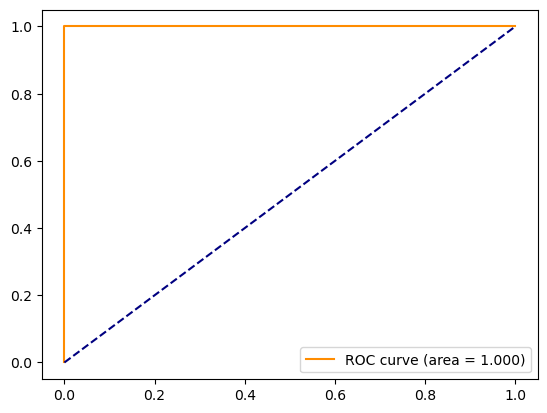

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=sorted(res, reverse=True)[0][2])
model = KNeighborsClassifier(n_neighbors=sorted(res, reverse=True)[0][1])
pipeline = make_pipeline(StandardScaler(), model)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend()

In [43]:
sorted(res, reverse=True)

[(1.0, 12, 35),
 (1.0, 10, 34),
 (1.0, 8, 34),
 (1.0, 6, 34),
 (1.0, 4, 80),
 (1.0, 4, 37),
 (1.0, 4, 34),
 (1.0, 4, 17),
 (1.0, 2, 53),
 (1.0, 2, 44),
 (1.0, 2, 34),
 (1.0, 2, 29),
 (1.0, 1, 53),
 (1.0, 1, 44),
 (0.989010989010989, 13, 80),
 (0.989010989010989, 11, 35),
 (0.989010989010989, 10, 35),
 (0.989010989010989, 9, 35),
 (0.989010989010989, 8, 53),
 (0.989010989010989, 8, 35),
 (0.989010989010989, 8, 17),
 (0.989010989010989, 7, 37),
 (0.989010989010989, 7, 35),
 (0.989010989010989, 6, 35),
 (0.989010989010989, 6, 17),
 (0.989010989010989, 5, 35),
 (0.989010989010989, 5, 17),
 (0.9888888888888889, 14, 80),
 (0.9888888888888889, 14, 37),
 (0.9888888888888889, 13, 37),
 (0.9888888888888889, 12, 88),
 (0.9888888888888889, 11, 88),
 (0.9888888888888889, 11, 5),
 (0.9888888888888889, 10, 88),
 (0.9888888888888889, 10, 41),
 (0.9888888888888889, 10, 40),
 (0.9888888888888889, 9, 88),
 (0.9888888888888889, 9, 40),
 (0.9888888888888889, 9, 37),
 (0.9888888888888889, 9, 5),
 (0.9888888